# Plots in the Latest Version of the Manuscript

[![Manuscript Version](https://img.shields.io/badge/manuscript-v2.6-red?style=for-the-badge)](https://doi.org/10.1364/JOSAB.507012)
[![Toolbox Version](https://img.shields.io/badge/qutip-v4.7.3-red?style=for-the-badge)](https://qutip.org/downloads/4.7.3/qutip-doc-4.7.pdf)
[![Toolbox Version](https://img.shields.io/badge/qom-v1.0.1-red?style=for-the-badge)](https://sampreet.github.io/qom-docs/v1.0.1)

## Dependencies

In [1]:
# dependencies
import numpy as np
import os
import sys

# qom modules
from qom.ui.plotters import MPLPlotter
from qom.utils.loopers import wrap_looper

# add path to local libraries
sys.path.append(os.path.abspath(os.path.join('../../')))
# import function
from common.g_2_0 import *

## Figure 3

(a) Zero time delay second-order correlation $g^{(2)} (0)$ with variation in the coupling strength ratio $g_{2} / g_{1}$ and the magnon detuning $\delta_{1}$ obtained using Eq. (9) when $\delta_{q} = \delta_{2} = 0$.
The dashed lines denote the minima for fixed values of $\delta_{1}$ and $g_{2} / g_{1}$.
(b) Behavior of $g^{(2)} (0)$ with variation in $\delta_{1}$ for different values of coupling strength ratio $g_{2} / g_{1}$.
(c) Behavior of $g^{(2)} (0)$ with variation in $g_{2} / g_{1}$ for different values of $\delta_{1}$.
The solid lines denote the values obtained using the approximate expression in Eq. (6).
The corresponding scatter points represent the respective values obtained from (a).
Other parameters (in units of $\kappa$) are $\gamma = 1.11$, $g_{1} = 0.8$, and $\Omega = 0.001$.

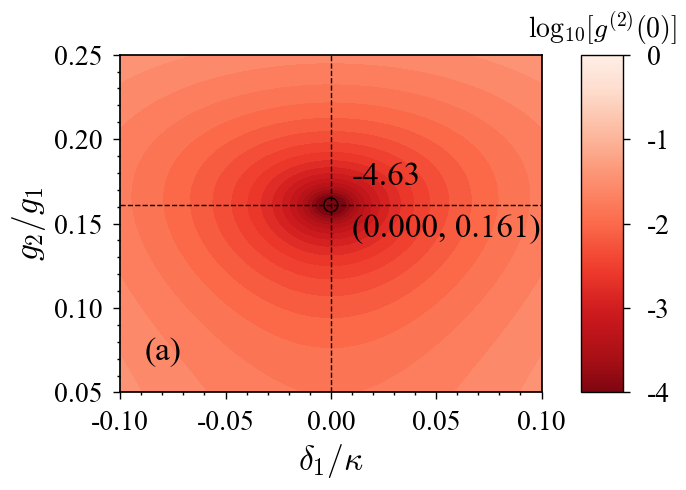

In [2]:
# system parameters
N       = 5
kappa   = 1.0
gamma   = 1.11 * kappa
# gamma   = 1.1 * kappa # alt
delta_q = 0.0 * kappa
delta_2 = 0.0 * kappa
g_1     = 0.8 * kappa
Omega   = 1e-3 * kappa
dim_1   = 201
dim_2   = 201

# load data
data = np.load('../../data/v2.6_qutip-v4.7.3/3_' + '_'.join([str(param) for param in [N, kappa, gamma, delta_q, delta_2, g_1, Omega, dim_1, dim_2]]) + '.npz')
X = data['arr_0']
Y = data['arr_1']
g_2_0s = data['arr_2']

# track minimum
idx = np.argmin(g_2_0s)
idx_x = idx % dim_1
idx_y = int(idx / dim_1)
pos = (X[idx_y, idx_x], Y[idx_y, idx_x], np.log10(g_2_0s[idx_y, idx_x]))

# plotter
plotter = MPLPlotter(
    axes={
        'X' : X[0],
        'Y' : [y[0] for y in Y]
    },
    params={
        'type'                  : 'contourf',
        'palette'               : 'Reds_r',
        'bins'                  : 21,
        'x_label'               : '$\\delta_{1} / \\kappa$',
        'x_tick_labels'         : ['{:0.2f}'.format(i * 0.05 - 0.1) for i in range(5)],
        'x_tick_position'       : 'bottom-out',
        'x_ticks'               : [i * 0.05 - 0.1 for i in range(5)],
        'x_ticks_minor'         : [i * 0.01 - 0.1 for i in range(21)],
        'y_label'               : '$g_{2} / g_{1}$',
        'y_tick_labels'         : ['{:0.2f}'.format(i * 0.05 + 0.05) for i in range(5)],
        'y_tick_position'       : 'left-out',
        'y_ticks'               : [i * 0.05 + 0.05 for i in range(5)],
        'y_ticks_minor'         : [i * 0.01 + 0.05 for i in range(21)],
        'show_cbar'             : True,
        'cbar_ticks'            : [i * 1 - 4 for i in range(5)],
        'cbar_title'            : '$\\mathrm{log}_{10} [ g^{(2)} (0) ]$',
        'cbar_title_font_dict'  : 'tick',
        'label_font_size'       : 24,
        'tick_font_size'        : 20,
        'width'                 : 6.4,
        'annotations'           : [{
            'text'      : '(a)',
            'xy'        : (0.21, 0.26),
            'font_dict' : 'label',
            'color'     : 'k'
        }, {
            'text'      : '({:0.3f}, {:0.3f})'.format(pos[0], pos[1]),
            'xy'        : (0.51, 0.505),
            # 'xy'        : (0.51, 0.535), # alt
            'font_dict' : 'tick',
            'color'     : 'k'
        }, {
            'text'      : '{:0.2f}'.format(pos[2]),
            'xy'        : (0.51, 0.61),
            # 'xy'        : (0.51, 0.65), # alt
            'font_dict' : 'label',
            'color'     : 'k'
        }]
    }
)
plotter.update(
    vs=np.log10(g_2_0s)
)
fig = plotter.get_current_figure()
ax = fig.axes[0]
ax.plot(X[0], [pos[1]] * len(X[0]), linestyle='--', linewidth=1, color='k')
ax.plot([pos[0]] * len(Y[:, 0]), Y[:, 0], linestyle='--', linewidth=1, color='k')
ax.scatter([pos[0]], [pos[1]], s=100, marker='o', facecolors='none', edgecolors='k')
plotter.show()

0.00028338841312653665
2.1614764945040533e-06
0.00021107007118849674


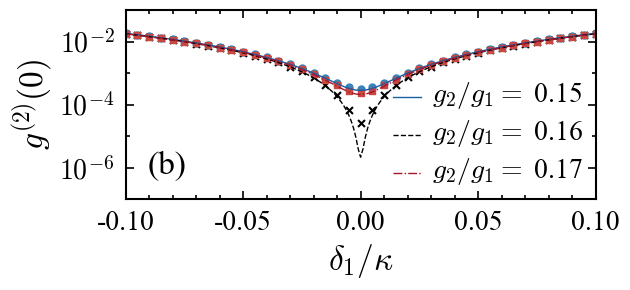

In [3]:
# data points
xs = X[0]
ys = [y[0] for y in Y[100:130:10]]
# ys = [y[0] for y in Y[110:140:10]] # alt
vs_a = list()
xs_n = xs[::5]
vs_n = [v[::5] for v in g_2_0s[100:130:10]]
# vs_n = [v[::5] for v in g_2_0s[110:140:10]] # alt
for g_2_g_1_ratio in ys:
    # update coupling strength
    g_2 = g_2_g_1_ratio * g_1
    g_2_0s_temp = list()
    for delta_1_norm in xs:
        # update magnon detuning
        delta_1 = delta_1_norm * kappa

        # update correlations
        g_2_0 = get_g_2_0_simplified([kappa, gamma, delta_q, delta_1, delta_2, g_1, g_2, Omega])
        g_2_0s_temp.append(g_2_0)
    vs_a.append(g_2_0s_temp)
    print(np.min(g_2_0s_temp))

# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'              : 'lines',
        'palette'           : 'RdBu_r',
        'bins'              : 11,
        'colors'            : [0, 'k', -1],
        'sizes'             : [1, 1, 1],
        'x_label'           : '$\\delta_{1} / \\kappa$',
        'x_tick_labels'     : ['{:0.2f}'.format(i * 0.05 - 0.1) for i in range(5)],
        'x_ticks'           : [i * 0.05 - 0.1 for i in range(5)],
        'x_ticks_minor'     : [i * 0.01 - 0.1 for i in range(21)],
        'v_label'           : '$g^{(2)} (0)$',
        'v_limits'          : [10**(-7), 10**(-1)],
        'v_scale'           : 'log',
        'v_tick_labels'     : ['$10^{' + str(i * 2 - 6) + '}$' for i in range(3)],
        'v_ticks'           : [10**(i * 2 - 6) for i in range(3)],
        'v_ticks_minor'     : [10**(i - 7) for i in range(7)],
        'show_legend'       : True,
        'legend_labels'     : [f'$g_{2} / g_{1} =$ {y:0.2f}' for y in ys],
        'legend_location'   : 'lower right',
        'label_font_size'   : 24,
        'legend_font_size'  : 20,
        'tick_font_size'    : 20,
        'width'             : 6.4,
        'height'            : 3.0,
        'annotations'       : [{
            'text'      : '(b)',
            'xy'        : (0.23, 0.39),
            'font_dict' : 'label',
            'color'     : 'k'
        }]
    }
)
plotter.update(
    vs=vs_a,
    xs=xs
)
ax = plotter.get_current_figure().axes[0]
colors = plotter.get_colors(
    palette='RdBu_r',
    bins=11
)
ax.scatter(xs_n, vs_n[0], s=25, marker='o', color=colors[1])
ax.scatter(xs_n, vs_n[1], s=25, marker='x', color='k')
ax.scatter(xs_n, vs_n[2], s=25, marker='s', color=colors[-2])
# ax.plot(X[0], [pos_1[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[-2])
# ax.scatter([pos_1[0]], [pos_1[1]], s=100, marker='o', facecolors='none', edgecolors='k')
# ax.plot([pos_2[0]] * len(Y[:, 0]), Y[:, 0], linestyle='--', linewidth=1, color=colors[-2])
# ax.plot(X[0], [pos_2[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[1])
# ax.scatter([pos_2[0]], [pos_2[1]], s=100, marker='o', facecolors='none', edgecolors='k')
plotter.show()

0.0001758195739570283
1.0404614908494747e-08
0.00017581957395702773


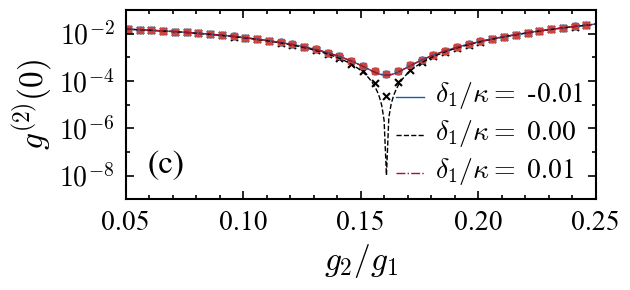

In [4]:
# data points
xs = [y[0] for y in Y]
ys = X[0][90:111:10]
# ys = X[0][50:100:20] # alt
vs_a = list()
xs_n = xs[1::5]
vs_n = np.transpose([v[90:111:10] for v in g_2_0s[1::5]])
# vs_n = np.transpose([v[50:100:20] for v in g_2_0s[::5]]) # alt
for delta_1_norm in ys:
    # update magnon detuning
    delta_1 = delta_1_norm * kappa
    g_2_0s_temp = list()
    for g_2_g_1_ratio in xs:
        # update coupling strength
        g_2 = g_2_g_1_ratio * g_1

        # update correlations
        g_2_0 = get_g_2_0_simplified([kappa, gamma, delta_q, delta_1, delta_2, g_1, g_2, Omega])
        g_2_0s_temp.append(g_2_0)
    vs_a.append(g_2_0s_temp)
    print(np.min(g_2_0s_temp))

# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'              : 'lines',
        'palette'           : 'RdBu_r',
        'bins'              : 11,
        'colors'            : [0, 'k', -1],
        'sizes'             : [1, 1, 1],
        'x_label'           : '$g_{2} / g_{1}$',
        'x_tick_labels'     : ['{:0.2f}'.format(i * 0.05 + 0.05) for i in range(5)],
        'x_ticks'           : [i * 0.05 + 0.05 for i in range(5)],
        'x_ticks_minor'     : [i * 0.01 + 0.05 for i in range(21)],
        'v_label'           : '$g^{(2)} (0)$',
        'v_limits'          : [10**(-9), 10**(-1)],
        'v_scale'           : 'log',
        'v_tick_labels'     : ['$10^{' + str(i * 2 - 8) + '}$' for i in range(4)],
        'v_ticks'           : [10**(i * 2 - 8) for i in range(4)],
        'v_ticks_minor'     : [10**(i - 9) for i in range(9)],
        'show_legend'       : True,
        'legend_labels'     : [f'$\\delta_{1} / \\kappa =$ {y:0.2f}' for y in ys],
        'legend_location'   : 'lower right',
        'label_font_size'   : 24,
        'legend_font_size'  : 20,
        'tick_font_size'    : 20,
        'width'             : 6.4,
        'height'            : 3.0,
        'annotations'       : [{
            'text'      : '(c)',
            'xy'        : (0.23, 0.39),
            'font_dict' : 'label',
            'color'     : 'k'
        }]
    }
)
plotter.update(
    vs=vs_a,
    xs=xs
)
ax = plotter.get_current_figure().axes[0]
colors = plotter.get_colors(
    palette='RdBu_r',
    bins=11
)
ax.scatter(xs_n, vs_n[0], s=25, marker='o', color=colors[1])
ax.scatter(xs_n, vs_n[1], s=25, marker='x', color='k')
ax.scatter(xs_n, vs_n[2], s=25, marker='s', color=colors[-2])
# ax.plot(X[0], [pos_1[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[-2])
# ax.scatter([pos_1[0]], [pos_1[1]], s=100, marker='o', facecolors='none', edgecolors='k')
# ax.plot([pos_2[0]] * len(Y[:, 0]), Y[:, 0], linestyle='--', linewidth=1, color=colors[-2])
# ax.plot(X[0], [pos_2[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[1])
# ax.scatter([pos_2[0]], [pos_2[1]], s=100, marker='o', facecolors='none', edgecolors='k')
plotter.show()

## Figure 4

(a) Numerical values of zero time delay second-order correlation $g^{(2)} (0)$ with variation in the magnon detuning $\delta_{1}$ and the coupling strength ratio $g_{2} / g_{1}$ when $\delta_{q} = \delta_{2} = 0.1 \kappa$.
The dashed lines denote the minima for fixed values of $\delta_{1}$ and $g_{2} / g_{1}$.
(b) Plot of $g^{(2)} (0)$ obtained analytically (solid lines) and numerically (scatter plots) with $\delta_{1}$ for different values of $g_{2} / g_{1}$.
(c) Variation of $g^{(2)} (0)$ with respect to $g_{2} / g_{1}$ for different values of $\delta_{1}$. Other parameters are the same as in Fig. 3.

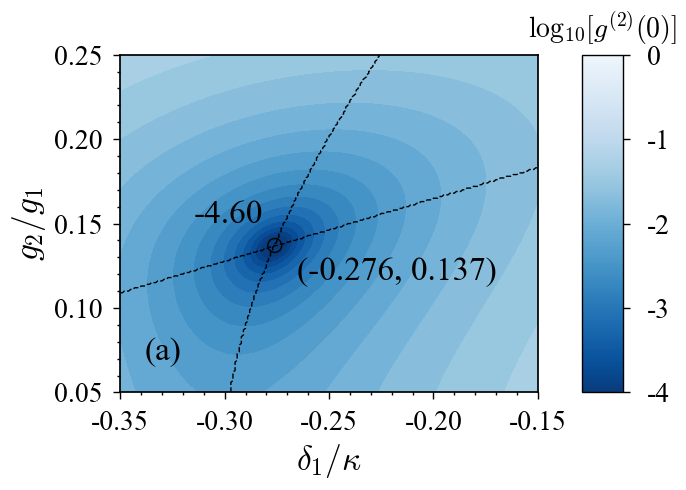

In [5]:
# system params
N       = 5
kappa   = 1.0
gamma   = 1.11 * kappa
# gamma   = 1.1 * kappa # alt
delta_q = 0.1 * kappa
delta_2 = 0.1 * kappa
g_1     = 0.8 * kappa
Omega   = 1e-3 * kappa
dim_1   = 201
dim_2   = 201

# load data
data = np.load('../../data/v2.6_qutip-v4.7.3/4_' + '_'.join([str(param) for param in [N, kappa, gamma, delta_q, delta_2, g_1, Omega, dim_1, dim_2]]) + '.npz')
X = data['arr_0']
Y = data['arr_1']
g_2_0s = data['arr_2']

# track minimum
idx = np.argmin(g_2_0s)
idx_x = idx % dim_1
idx_y = int(idx / dim_1)
pos = (X[idx_y, idx_x], Y[idx_y, idx_x], np.log10(g_2_0s[idx_y, idx_x]))
xs_min = X[0, np.argmin(g_2_0s, axis=1)]
ys_min = Y[np.argmin(g_2_0s, axis=0), 0]

plotter = MPLPlotter(
    axes={
        'X' : X[0],
        'Y' : [y[0] for y in Y]
    },
    params={
        'type'                  : 'contourf',
        'palette'               : 'Blues_r',
        'bins'                  : 21,
        'x_label'               : '$\\delta_{1} / \\kappa$',
        'x_tick_labels'         : ['{:0.2f}'.format(i * 0.05 - 0.35) for i in range(5)],
        'x_tick_position'       : 'bottom-out',
        'x_ticks'               : [i * 0.05 - 0.35 for i in range(5)],
        'x_ticks_minor'         : [i * 0.01 - 0.35 for i in range(21)],
        'y_label'               : '$g_{2} / g_{1}$',
        'y_tick_labels'         : ['{:0.2f}'.format(i * 0.05 + 0.05) for i in range(5)],
        'y_tick_position'       : 'left-out',
        'y_ticks'               : [i * 0.05 + 0.05 for i in range(5)],
        'y_ticks_minor'         : [i * 0.01 + 0.05 for i in range(21)],
        'show_cbar'             : True,
        'cbar_ticks'            : [i * 1 - 4 for i in range(5)],
        'cbar_title'            : '$\\mathrm{log}_{10} [ g^{(2)} (0) ]$',
        'cbar_title_font_dict'  : 'tick',
        'label_font_size'       : 24,
        'tick_font_size'        : 20,
        'width'                 : 6.4,
        'annotations'           : [{
            'text'      : '(a)',
            'xy'        : (0.21, 0.26),
            'font_dict' : 'label',
            'color'     : 'k'
        }, {
            'text'      : '({:0.3f}, {:0.3f})'.format(pos[0], pos[1]),
            'xy'        : (0.43, 0.42),
            # 'xy'        : (0.44, 0.46), # alt
            'font_dict' : 'tick',
            'color'     : 'k'
        }, {
            'text'      : '{:0.2f}'.format(pos[2]),
            'xy'        : (0.28, 0.535),
            # 'xy'        : (0.44, 0.575), # alt
            'font_dict' : 'label',
            'color'     : 'k'
        }]
    }
)
plotter.update(
    vs=np.log10(g_2_0s)
)
fig = plotter.get_current_figure()
ax = fig.axes[0]
ax.plot(X[0], ys_min, linestyle='--', linewidth=1, color='k')
ax.plot(xs_min, Y[:, 0], linestyle='--', linewidth=1, color='k')
ax.scatter([pos[0]], [pos[1]], s=100, marker='o', facecolors='none', edgecolors='k')
plotter.show()

6.099494867172485e-05
1.9172340516800916e-05
0.0002968878779037642


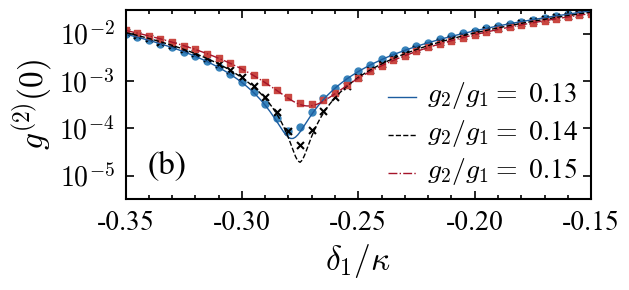

In [6]:
# data points
xs      = X[0]
ys      = [y[0] for y in Y[80:110:10]]
# ys      = [y[0] for y in Y[90:120:10]] # alt
vs_a    = list()
xs_n    = xs[::5]
vs_n    = [v[::5] for v in g_2_0s[80:110:10]]
# vs_n    = [v[::5] for v in g_2_0s[90:120:10]] # alt
for g_2_g_1_ratio in ys:
    # update coupling strength
    g_2 = g_2_g_1_ratio * g_1
    g_2_0s_temp = list()
    for delta_1_norm in xs:
        # update magnon detuning
        delta_1 = delta_1_norm * kappa

        # update correlations
        g_2_0 = get_g_2_0_simplified([kappa, gamma, delta_q, delta_1, delta_2, g_1, g_2, Omega])
        g_2_0s_temp.append(g_2_0)
    vs_a.append(g_2_0s_temp)
    print(np.min(g_2_0s_temp))

# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'              : 'lines',
        'palette'           : 'RdBu_r',
        'bins'              : 11,
        'colors'            : [0, 'k', -1],
        'sizes'             : [1, 1, 1],
        'x_label'           : '$\\delta_{1} / \\kappa$',
        'x_tick_labels'     : ['{:0.2f}'.format(i * 0.05 - 0.35) for i in range(5)],
        'x_ticks'           : [i * 0.05 - 0.35 for i in range(5)],
        'x_ticks_minor'     : [i * 0.01 - 0.35 for i in range(21)],
        'v_label'           : '$g^{(2)} (0)$',
        'v_limits'          : [10**(-5) / np.sqrt(10), np.sqrt(10) * 10**(-2)],
        'v_scale'           : 'log',
        'v_tick_labels'     : ['$10^{' + str(i - 5) + '}$' for i in range(4)],
        'v_ticks'           : [10**(i - 5) for i in range(4)],
        'v_ticks_minor'     : [10**(i - 5) for i in range(7)],
        'show_legend'       : True,
        'legend_labels'     : [f'$g_{2} / g_{1} =$ {y:0.2f}' for y in ys],
        'legend_location'   : 'lower right',
        'label_font_size'   : 24,
        'legend_font_size'  : 20,
        'tick_font_size'    : 20,
        'width'             : 6.4,
        'height'            : 3.0,
        'annotations'       : [{
            'text'      : '(b)',
            'xy'        : (0.23, 0.39),
            'font_dict' : 'label',
            'color'     : 'k'
        }]
    }
)
plotter.update(
    vs=vs_a,
    xs=xs
)
ax = plotter.get_current_figure().axes[0]
colors = plotter.get_colors(
    palette='RdBu_r',
    bins=11
)
ax.scatter(xs_n, vs_n[0], s=25, marker='o', color=colors[1])
ax.scatter(xs_n, vs_n[1], s=25, marker='x', color='k')
ax.scatter(xs_n, vs_n[2], s=25, marker='s', color=colors[-2])
# ax.plot(X[0], [pos_1[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[-2])
# ax.scatter([pos_1[0]], [pos_1[1]], s=100, marker='o', facecolors='none', edgecolors='k')
# ax.plot([pos_2[0]] * len(Y[:, 0]), Y[:, 0], linestyle='--', linewidth=1, color=colors[-2])
# ax.plot(X[0], [pos_2[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[1])
# ax.scatter([pos_2[0]], [pos_2[1]], s=100, marker='o', facecolors='none', edgecolors='k')
plotter.show()

0.0009221578418775176
2.1618662020570632e-05
0.0004308904910304575


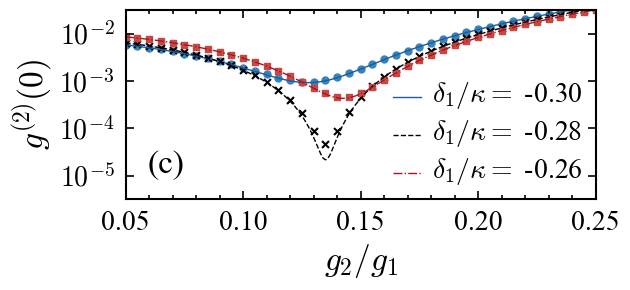

In [7]:
# data points
xs = [y[0] for y in Y]
ys = X[0][50:100:20]
# ys = X[0][50:100:20] # alt
vs_a = list()
xs_n = xs[::5]
vs_n = np.transpose([v[50:100:20] for v in g_2_0s[::5]])
# vs_n = np.transpose([v[50:100:20] for v in g_2_0s[::5]]) # alt
for delta_1_norm in ys:
    # update magnon detuning
    delta_1 = delta_1_norm * kappa
    g_2_0s_temp = list()
    for g_2_g_1_ratio in xs:
        # update coupling strength
        g_2 = g_2_g_1_ratio * g_1

        # update correlations
        g_2_0 = get_g_2_0_simplified([kappa, gamma, delta_q, delta_1, delta_2, g_1, g_2, Omega])
        g_2_0s_temp.append(g_2_0)
    vs_a.append(g_2_0s_temp)
    print(np.min(g_2_0s_temp))

# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'              : 'lines',
        'palette'           : 'RdBu_r',
        'bins'              : 11,
        'colors'            : [0, 'k', -1],
        'sizes'             : [1, 1, 1],
        'x_label'           : '$g_{2} / g_{1}$',
        'x_tick_labels'     : ['{:0.2f}'.format(i * 0.05 + 0.05) for i in range(5)],
        'x_ticks'           : [i * 0.05 + 0.05 for i in range(5)],
        'x_ticks_minor'     : [i * 0.01 + 0.05 for i in range(21)],
        'v_label'           : '$g^{(2)} (0)$',
        'v_limits'          : [10**(-5) / np.sqrt(10), np.sqrt(10) * 10**(-2)],
        'v_scale'           : 'log',
        'v_tick_labels'     : ['$10^{' + str(i - 5) + '}$' for i in range(4)],
        'v_ticks'           : [10**(i - 5) for i in range(4)],
        'v_ticks_minor'     : [10**(i - 5) for i in range(7)],
        'show_legend'       : True,
        'legend_labels'     : [f'$\\delta_{1} / \\kappa =$ {y:0.2f}' for y in ys],
        'legend_location'   : 'lower right',
        'label_font_size'   : 24,
        'legend_font_size'  : 20,
        'tick_font_size'    : 20,
        'width'             : 6.4,
        'height'            : 3.0,
        'annotations'       : [{
            'text'      : '(c)',
            'xy'        : (0.23, 0.39),
            'font_dict' : 'label',
            'color'     : 'k'
        }]
    }
)
plotter.update(
    vs=vs_a,
    xs=xs
)
ax = plotter.get_current_figure().axes[0]
colors = plotter.get_colors(
    palette='RdBu_r',
    bins=11
)
ax.scatter(xs_n, vs_n[0], s=25, marker='o', color=colors[1])
ax.scatter(xs_n, vs_n[1], s=25, marker='x', color='k')
ax.scatter(xs_n, vs_n[2], s=25, marker='s', color=colors[-2])
# ax.plot(X[0], [pos_1[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[-2])
# ax.scatter([pos_1[0]], [pos_1[1]], s=100, marker='o', facecolors='none', edgecolors='k')
# ax.plot([pos_2[0]] * len(Y[:, 0]), Y[:, 0], linestyle='--', linewidth=1, color=colors[-2])
# ax.plot(X[0], [pos_2[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[1])
# ax.scatter([pos_2[0]], [pos_2[1]], s=100, marker='o', facecolors='none', edgecolors='k')
plotter.show()

## Figure 5

Magnon detuning $\delta_{1}$ at which the highest antibunching is observed for different values of the coupling strength ratio $g_{2} / g_{1}$ and the qubit detuning $\delta_{q}$ obtained using Eq. (7).
Here, $\delta_{2} = \delta_{q} with other parameters the same as in Fig. 4.

MainThread               INFO    2024-01-30 14:10:29.163: (qom.ui.log) -------------------------------------------------Logger Initialized
MainThread               INFO    2024-01-30 14:10:29.164: (qom.loopers.XYZLooper) --------------------------------------Looper Initialized	
MainThread               INFO    2024-01-30 14:10:38.609: (qom.loopers.XYZLooper) ------------------------------------------Results Loaded	


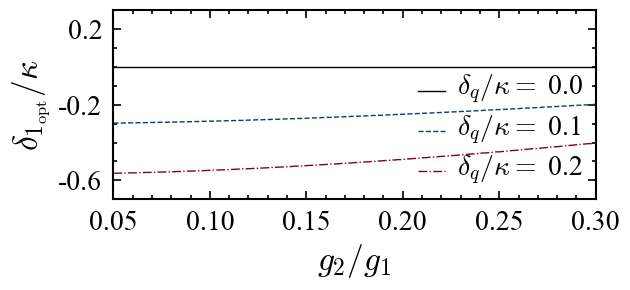

In [8]:
# system parameters
N       = 5
kappa   = 1.0
gamma   = 1.11 * kappa
g_1     = 0.8 * kappa
Omega   = 1e-3 * kappa
dim_1   = 1001
dim_2   = 251
dim_3   = 251
load    = True

# function to obtain the blockade condition
def func(system_params):
    delta_q = system_params['delta_q']
    delta_1 = system_params['delta_1']
    delta_2 = delta_q
    g_2 = system_params['g_2']
    return get_condition([kappa, gamma, delta_q, delta_1, delta_2, g_1, g_2, Omega])

# looper
looper = wrap_looper(
    looper_name='XYZLooper',
    func=func,
    params={
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v2.6_qom-v1.0.1/5',
        'X'                 : {
            'var'   : 'delta_1',
            'min'   : -kappa,
            'max'   : 0.0,
            'dim'   : dim_1
        },
        'Y'                 : {
            'var'   : 'g_2',
            'min'   : 0.05 * g_1,
            'max'   : 0.30 * g_1,
            'dim'   : dim_2
        },
        'Z'                 : {
            'var'   : 'delta_q',
            'min'   : 0.0,
            'max'   : 0.25 * kappa,
            'dim'   : dim_3
        }
    },
    params_system={}
)
delta_1s = looper.axes['X']['val']
g_2s = looper.axes['Y']['val']
delta_qs = looper.axes['Z']['val']
conditions = looper.results['V']

# find positions
vs = list()
for i in range(dim_3):
    vs_temp = list()
    for j in range(dim_2):
        vs_temp.append(delta_1s[np.argmin(conditions[i][j])])
    vs.append(vs_temp)

# plotter
plotter = MPLPlotter(
    axes={
        'X' : g_2s / g_1, 
        'Y' : delta_qs[::100]
    }, params={
        'type'              : 'lines',
        'palette'           : 'RdBu',
        'bins'              : 41,
        'colors'            : ['k', -1, 0],
        'x_label'           : '$g_{2} / g_{1}$',
        'x_tick_labels'     : ['{:0.2f}'.format(i * 0.05 + 0.05) for i in range(6)],
        # 'x_tick_position'   : 'bottom-out',
        'x_ticks'           : [i * 0.05 + 0.05 for i in range(6)],
        'x_ticks_minor'     : [i * 0.01 + 0.05 for i in range(26)],
        # 'y_label'           : '$\\delta_{q} / \\kappa$, $\\delta_{2} / \\kappa$',
        # 'y_tick_labels'     : ['{:0.2f}'.format(i * 0.05) for i in range(6)],
        # 'y_tick_position'   : 'left-out',
        # 'y_ticks'           : [i * 0.05 for i in range(6)],
        # 'y_ticks_minor'     : [i * 0.01 for i in range(26)],
        # 'show_cbar'         : True,
        # 'cbar_title'        : '$\\delta_{1} / \\kappa$',
        # 'cbar_tick_labels'  : [f'{i * 0.1 - 0.7:0.1f}' for i in range(8)],
        # 'cbar_ticks'        : [i * 0.1 - 0.7 for i in range(8)],
        'v_label'           : '$\\delta_{1_{\\mathrm{opt}}} / \\kappa$',
        'v_limits'          : [-0.7, 0.3],
        'v_tick_labels'     : [f'{i * 0.4 - 0.6:0.1f}' for i in range(3)],
        'v_ticks'           : [i * 0.4 - 0.6 for i in range(3)],
        'v_ticks_minor'     : [i * 0.1 - 0.7 for i in range(9)],
        'show_legend'       : True,
        'legend_labels'     : ['$\\delta_{q} / \\kappa =$ ' + f'{y:0.1f}' for y in [0.0, 0.1, 0.2]],
        'legend_location'   : 'lower right',
        'label_font_size'   : 24,
        'legend_font_size'  : 20,
        'tick_font_size'    : 20,
        'width'             : 6.4,
        'height'            : 3.0
    }
)
plotter.update(
    vs=vs[::100],
    xs=g_2s / g_1
)
plotter.show()

## Figure 6

Numerical values of the zero time delay second-order correlation $g^{(2)} (0)$ with variation in the qubit detuning $\delta_{q}$ and the driven magnon detuning $\delta_{1}$.
Here, $\delta_{2} = 0.1 \kappa$ and $g_{2} = 0.125 g_{1}$.
Other parameters are the same as in Fig. 3.

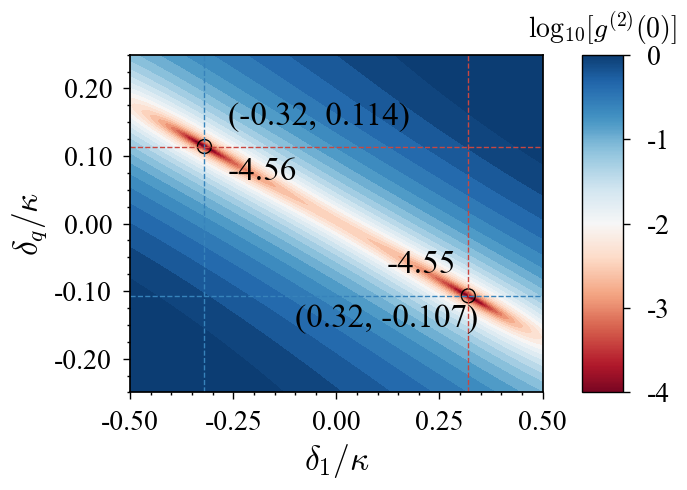

In [9]:
# system parameters
N       = 5
kappa   = 1.0
gamma   = 1.11 * kappa
# gamma   = 1.1 * kappa # alt
delta_2 = 0.1 * kappa
g_1     = 0.8 * kappa
g_2     = 0.1 * kappa
Omega   = 1e-3 * kappa
dim_1   = 101
dim_2   = 501

# load data
data = np.load('../../data/v2.6_qutip-v4.7.3/6_' + '_'.join([str(param) for param in [N, kappa, gamma, delta_2, g_1, g_2, Omega, dim_1, dim_2]]) + '.npz')
X = data['arr_0']
Y = data['arr_1']
g_2_0s = data['arr_2']

# track minimum
idx_1 = np.argmin(g_2_0s[:int(dim_2 / 2)])
idx_1_x = idx_1 % dim_1
idx_1_y = int(idx_1 / dim_1)
pos_1 = (X[idx_1_y, idx_1_x], Y[idx_1_y, idx_1_x], np.log10(g_2_0s[idx_1_y, idx_1_x]))
idx_2 = np.argmin(g_2_0s[int(dim_2 / 2):])
idx_2_x = idx_2 % dim_1
idx_2_y = int(idx_2 / dim_1) + int(dim_2 / 2)
pos_2 = (X[idx_2_y, idx_2_x], Y[idx_2_y, idx_2_x], np.log10(g_2_0s[idx_2_y, idx_2_x]))

# plotter
plotter = MPLPlotter(
    axes={
        'X' : X[0],
        'Y' : [y[0] for y in Y]
    },
    params={
        'type'                  : 'contourf',
        'palette'               : 'RdBu',
        'bins'                  : 41,
        'x_label'               : '$\\delta_{1} / \\kappa$',
        'x_tick_labels'         : ['{:0.2f}'.format(i * 0.25 - 0.5) for i in range(5)],
        'x_tick_position'       : 'bottom-out',
        'x_ticks'               : [i * 0.25 - 0.5 for i in range(5)],
        'x_ticks_minor'         : [i * 0.05 - 0.5 for i in range(21)],
        'y_label'               : '$\\delta_{q} / \\kappa$',
        'y_tick_labels'         : ['{:0.2f}'.format(i * 0.1 - 0.2) for i in range(5)],
        'y_tick_position'       : 'left-out',
        'y_ticks'               : [i * 0.1 - 0.2 for i in range(5)],
        'y_ticks_minor'         : [i * 0.025 - 0.25 for i in range(21)],
        'show_cbar'             : True,
        'cbar_ticks'            : [i * 1 - 4 for i in range(5)],
        'cbar_title'            : '$\\mathrm{log}_{10} [ g^{(2)} (0) ]$',
        'cbar_title_font_dict'  : 'tick',
        'label_font_size'       : 24,
        'tick_font_size'        : 20,
        'width'                 : 6.4,
        'annotations'           : [{
            'text'      : '({:0.2f}, {:0.3f})'.format(pos_1[0], pos_1[1]),
            'xy'        : (0.428, 0.325),
            # 'xy'        : (0.46, 0.3), # alt
            'font_dict' : 'tick',
            'color'     : 'k'
        }, {
            'text'      : '{:0.2f}'.format(pos_1[2]),
            'xy'        : (0.56, 0.435),
            # 'xy'        : (0.59, 0.395), # alt
            'font_dict' : 'label',
            'color'     : 'k'
        }, {
            'text'      : '({:0.2f}, {:0.3f})'.format(pos_2[0], pos_2[1], pos_2[2]),
            'xy'        : (0.33, 0.73),
            # 'xy'        : (0.3, 0.755), # alt
            'font_dict' : 'tick',
            'color'     : 'k'
        }, {
            'text'      : '{:0.2f}'.format(pos_2[2]),
            'xy'        : (0.33, 0.62),
            # 'xy'        : (0.3, 0.65), # alt
            'font_dict' : 'label',
            'color'     : 'k'
        }]
    }
)
plotter.update(
    vs=np.log10(g_2_0s)
)
ax = plotter.get_current_figure().axes[0]
colors = plotter.get_colors(
    palette='RdBu_r',
    bins=11
)
ax.plot([pos_1[0]] * len(Y[:, 0]), Y[:, 0], linestyle='--', linewidth=1, color=colors[-2])
ax.plot(X[0], [pos_1[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[1])
ax.scatter([pos_1[0]], [pos_1[1]], s=100, marker='o', facecolors='none', edgecolors='k')
ax.plot([pos_2[0]] * len(Y[:, 0]), Y[:, 0], linestyle='--', linewidth=1, color=colors[1])
ax.plot(X[0], [pos_2[1]] * len(X[0]), linestyle='--', linewidth=1, color=colors[-2])
ax.scatter([pos_2[0]], [pos_2[1]], s=100, marker='o', facecolors='none', edgecolors='k')
plotter.show()

## Figure 7

Plot of zero time delay second-order correlation $g^{(2)} (0)$ with variation in mean thermal magnon number for zero detunings (solid blue lines) and for finite detunings (dotted-dashed red lines) at the
optimal values marked in Fig. 3 (a) and Fig. 4 (a), respectively.
The thin dashed black line represents $g^{(2)} (0) = 1$.
Other parameters are the same as in Fig. 3.

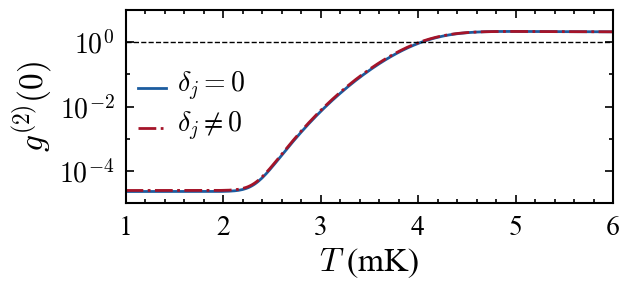

In [10]:
# system parameters
N       = 5
kappa   = 1.0
gamma   = 1.11 * kappa
g_1     = 0.8 * kappa
Omega   = 1e-3 * kappa
dim     = 251

# initialize
G_2_0s = list()

# load data for zero detuning
delta_q = 0.0 * kappa
delta_1 = 0.0 * kappa
delta_2 = 0.0 * kappa
g_2 = 0.161 * g_1
data = np.load('../../data/v2.6_qutip-v4.7.3/7_' + '_'.join([str(param) for param in [N, kappa, gamma, delta_q, delta_1, delta_2, g_1, g_2, Omega, dim]]) + '.npz')
Ts = data['arr_0']
G_2_0s.append(data['arr_1'])

# load data for finite detuning
delta_q = 0.1 * kappa
delta_1 = -0.276 * kappa
delta_2 = 0.1 * kappa
g_2 = 0.137 * g_1
data = np.load('../../data/v2.6_qutip-v4.7.3/7_' + '_'.join([str(param) for param in [N, kappa, gamma, delta_q, delta_1, delta_2, g_1, g_2, Omega, dim]]) + '.npz')
G_2_0s.append(data['arr_1'])

# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'              : 'lines',
        'bins'              : 11,
        'colors'            : [0, -1, 'k'],
        'sizes'             : [2, 2, 1],
        'styles'            : ['-', '-.', '--'],
        'x_label'           : '$T$ (mK)',
        'x_tick_labels'     : [i + 1 for i in range(6)],
        'x_ticks'           : [i * 1e-3 + 1e-3 for i in range(6)],
        'x_ticks_minor'     : [i * 0.2e-3 + 1e-3 for i in range(26)],
        'x_scale'           : 'linear',
        'v_label'           : '$g^{(2)} (0)$',
        'v_limits'          : [10**(- 5), 10],
        'v_scale'           : 'log',
        'v_tick_labels'     : ['$10^{' + str(i * 2 - 4) + '}$' for i in range(3)],
        'v_ticks'           : [10**(i * 2 - 4) for i in range(3)],
        'v_ticks_minor'     : [10**(i - 5) for i in range(7)],
        'show_legend'       : True,
        'legend_labels'     : ['$\\delta_{j} = 0$', '$\\delta_{j} \\neq 0$'],
        'legend_location'   : 'center left',
        'label_font_size'   : 24,
        'legend_font_size'  : 20,
        'tick_font_size'    : 20,
        'width'             : 6.4,
        'height'            : 3.0
    }
)
plotter.update(
    vs=G_2_0s + [[1] * len(Ts)],
    xs=Ts
)
plotter.show()

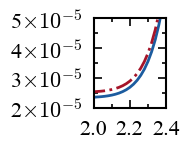

In [11]:
# plotter
plotter = MPLPlotter(
    axes={},
    params={
        'type'              : 'lines',
        'bins'              : 11,
        'colors'            : [0, -1, 'k'],
        'sizes'             : [2, 2, 1],
        'styles'            : ['-', '-.', '--'],
        'x_label'           : '',
        'x_tick_labels'     : [i * 0.2 + 2 for i in range(3)],
        'x_ticks'           : [i * 0.2e-3 + 2e-3 for i in range(3)],
        'x_ticks_minor'     : [i * 0.1e-3 + 2e-3 for i in range(5)],
        'x_scale'           : 'linear',
        'v_label'           : '',
        'v_limits'          : [2 * 10**(-5), 5 * 10**(-5)],
        'v_scale'           : 'linear',
        'v_tick_labels'     : [str(i + 2) + '$\\times 10^{-5}$' for i in range(4)],
        'v_ticks'           : [(i + 2) * 10**(-5) for i in range(4)],
        'v_ticks_minor'     : [(i * 0.5 + 2) * 10**(-5) for i in range(7)],
        'label_font_size'   : 20,
        'legend_font_size'  : 16,
        'tick_font_size'    : 16,
        'width'             : 2.0,
        'height'            : 1.6
    }
)
plotter.update(
    vs=G_2_0s + [[1] * len(Ts)],
    xs=Ts
)
plotter.show()